# Assignment 4

Approximate time needed: 6-7 hours
    
## DLT and Epipolar Lines

The goal of this assignment is to aid your understanding of the Direct Linear Transform as well as Epipolar geometry.

For the first part of the assignment you will find correspondences between 2D-3D points and estimate the P Matrix. You will then be required to estimate Camera Parameters from this P matrix.

The second part of this assignment will require you to construct epipolar lines on two corresponding images.

The third part of this assignment will require you to use camera intrinsics to estimate the bounding box of a car.

---
### 4.1 Generating Correspondences
The first step to perform DLT is to generate correspondences. The cell below opens a new window. Clicking anywhere on the image should give you the pixel location of the image. Once you're done clicking, close the image window. The cell after displays the points you have clicked.

In [1]:
%matplotlib tk
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
import numpy as np


image_points = []
fig = plt.figure(figsize=(20,30))

img = mpimg.imread('q1/dlt1.jpeg')

def onclick(event):
    ix, iy = event.xdata, event.ydata
    image_points.append([ix, iy])

cid = fig.canvas.mpl_connect('button_press_event', onclick)

imgplot = plt.imshow(img)
plt.show()

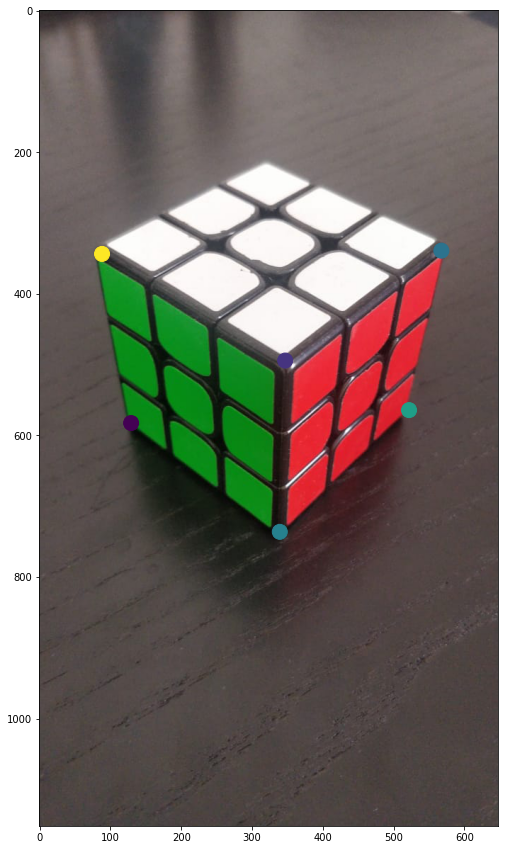

In [2]:
%matplotlib inline
N = len(image_points)
image_points = np.array(image_points)
fig = plt.figure(figsize=(10,15))

img=mpimg.imread('q1/dlt1.jpeg')
imgplot = plt.imshow(img)

colors = np.random.rand(N)
area = (15 * np.ones(N))**2 

plt.scatter(image_points[:,0], image_points[:,1], c=colors, s=area)
plt.show()

In [3]:
%matplotlib inline

After generating pixel locations, you have to generate the corresponding world points. You have the freedom to chose which point you want as origin. You can consider each side as 4 units.

Ensure that the ordering of your points matches the ordering of image points. Keep track of the sequence of corners clicked.

In [4]:
x = image_points
print(image_points)
print(x.shape)

[[346.84333012 494.2035711 ]
 [339.23344255 736.1979958 ]
 [129.20054564 582.4782669 ]
 [521.87074421 564.21453673]
 [ 88.10715277 343.52779723]
 [567.53006963 338.96186469]]
(6, 2)


In [5]:
xCol = np.ones((x.shape[0],1))
x = np.concatenate((x,xCol),axis=1)
print(x)
print(x.shape)

[[346.84333012 494.2035711    1.        ]
 [339.23344255 736.1979958    1.        ]
 [129.20054564 582.4782669    1.        ]
 [521.87074421 564.21453673   1.        ]
 [ 88.10715277 343.52779723   1.        ]
 [567.53006963 338.96186469   1.        ]]
(6, 3)


In [6]:
X = np.array([[0,0,4],[0,0,0],[-4,0,0],[0,4,0],[-4,0,4],[0,4,4]])
print(X)
print(X.shape)

[[ 0  0  4]
 [ 0  0  0]
 [-4  0  0]
 [ 0  4  0]
 [-4  0  4]
 [ 0  4  4]]
(6, 3)


In [7]:
XCol = np.ones((X.shape[0],1))
X = np.concatenate((X,XCol),axis=1)
print(X)
print(X.shape)

[[ 0.  0.  4.  1.]
 [ 0.  0.  0.  1.]
 [-4.  0.  0.  1.]
 [ 0.  4.  0.  1.]
 [-4.  0.  4.  1.]
 [ 0.  4.  4.  1.]]
(6, 4)


Now that we have the correspondences, we can estimate the P matrix. Implement the DLT function that returns the P matrix

Quick recap: x_i = P * X_i where (x_i, X_i) is the ith correspondence, and P is a 3x4 dimensional matrix. P is further decomposed as P = K * [ R | T].


In [8]:
P = np.zeros((3,4),dtype='float')
print(P)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [9]:
A_T = P[0,:]
B_T = P[1,:]
C_T = P[2,:]

In [10]:
print(A_T)

[0. 0. 0. 0.]


In [11]:
def ProjectionMatrix(x,X):
    xx = x[:,0]
    xy = x[:,1]
    Xx = X[:,0]
    Xy = X[:,1]
    Xz = X[:,2]
    
    n = x.shape[0]

    aX = np.c_[-Xx, -Xy, -Xz, -np.ones(n), np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n), np.multiply(xx,Xx), np.multiply(xx,Xy), np.multiply(xx, Xz), xx]
    aY = np.c_[np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n), -Xx, -Xy, -Xz, -np.ones(n), np.multiply(xy,Xx), np.multiply(xy,Xy), np.multiply(xy, Xz), xy]
    
    
    out = np.zeros((xx.shape[0]+Xx.shape[0], 12))
    #Alternate values of aX and aY of the form:
    #######################
#     [[Ax1 ]
#     [Ay1 ]
#     [Ax2 ]
#     [Ay2 ]
#      ..
#      .. ]
    #######################
    out[::2, :] = aX 
    out[1::2,:] = aY 
    print("AX Matrix:")
    print(aX.astype('int'))
    print("AY Matrix:")
    print(aY.astype('int'))
    print("A Matrix:")
    print(out.astype('int'))
    print("Shape of A")
    print(out.shape)
    
    
    U, S, V = np.linalg.svd(out)
    P = V[-1, :]
    P = np.reshape(P,(3,4))
    print("Projection Matrix:")
    print(P)
    return P

In [12]:
print(x)

[[346.84333012 494.2035711    1.        ]
 [339.23344255 736.1979958    1.        ]
 [129.20054564 582.4782669    1.        ]
 [521.87074421 564.21453673   1.        ]
 [ 88.10715277 343.52779723   1.        ]
 [567.53006963 338.96186469   1.        ]]


In [13]:
print(X)

[[ 0.  0.  4.  1.]
 [ 0.  0.  0.  1.]
 [-4.  0.  0.  1.]
 [ 0.  4.  0.  1.]
 [-4.  0.  4.  1.]
 [ 0.  4.  4.  1.]]


In [14]:
P = ProjectionMatrix(x,X)

AX Matrix:
[[   0    0   -4   -1    0    0    0    0    0    0 1387  346]
 [   0    0    0   -1    0    0    0    0    0    0    0  339]
 [   4    0    0   -1    0    0    0    0 -516    0    0  129]
 [   0   -4    0   -1    0    0    0    0    0 2087    0  521]
 [   4    0   -4   -1    0    0    0    0 -352    0  352   88]
 [   0   -4   -4   -1    0    0    0    0    0 2270 2270  567]]
AY Matrix:
[[    0     0     0     0     0     0    -4    -1     0     0  1976   494]
 [    0     0     0     0     0     0     0    -1     0     0     0   736]
 [    0     0     0     0     4     0     0    -1 -2329     0     0   582]
 [    0     0     0     0     0    -4     0    -1     0  2256     0   564]
 [    0     0     0     0     4     0    -4    -1 -1374     0  1374   343]
 [    0     0     0     0     0    -4    -4    -1     0  1355  1355   338]]
A Matrix:
[[    0     0    -4    -1     0     0     0     0     0     0  1387   346]
 [    0     0     0     0     0     0    -4    -1     0     0  

### Theory

- Explain how DLT is implemented and show why it works (proof)
- When does DLT fail?

## Analysing P

The next part of this question is to analyse how good our estimate is. Report the reprojection error of your P matrix

In [15]:
#Get reprojected points
def get_points(P, X):
#     xX = (P[0,0]*X[0,0]+P[0,1]*X[0,1]+P[0,2]*X[0,2]+P[0,3])/(P[2,0]*X[0,0]+P[2,1]*X[0,1]+P[2,2]*X[0,2]+P[2,3])
#     yX = (P[1,0]*X[0,0]+P[1,1]*X[0,1]+P[1,2]*X[0,2]+P[1,3])/(P[2,0]*X[0,0]+P[2,1]*X[0,1]+P[2,2]*X[0,2]+P[2,3])
    xEst = np.matmul(P,X.T)
    xEst = xEst/xEst[2]
#     xEst
    print(xEst[0:2,:])
    print("DD")
    print(xEst)
    print("SSS")
    print(xEst.T.reshape(6,3))
    return(xEst.T.reshape(6,3))
#     return x,y

# #Get reprojection error
# def get_err(x, X, P):
#     xEst = get_points(P,X)
#     err = xEst[:,0:2] - x[:,0:2]
#     err = np.mean((np.linalg.norm(err,axis=1)**2))
#     return err

In [16]:
xEst = get_points(P,X)

[[347.17407349 338.97380511 129.30197315 521.98800234  87.98239619
  567.38782555]
 [494.21503323 736.18922157 582.46082673 564.2382946  343.54924671
  338.93304234]]
DD
[[347.17407349 338.97380511 129.30197315 521.98800234  87.98239619
  567.38782555]
 [494.21503323 736.18922157 582.46082673 564.2382946  343.54924671
  338.93304234]
 [  1.           1.           1.           1.           1.
    1.        ]]
SSS
[[347.17407349 494.21503323   1.        ]
 [338.97380511 736.18922157   1.        ]
 [129.30197315 582.46082673   1.        ]
 [521.98800234 564.2382946    1.        ]
 [ 87.98239619 343.54924671   1.        ]
 [567.38782555 338.93304234   1.        ]]


In [17]:
print(xEst[:,0:2])

[[347.17407349 494.21503323]
 [338.97380511 736.18922157]
 [129.30197315 582.46082673]
 [521.98800234 564.2382946 ]
 [ 87.98239619 343.54924671]
 [567.38782555 338.93304234]]


In [18]:
print(x)

[[346.84333012 494.2035711    1.        ]
 [339.23344255 736.1979958    1.        ]
 [129.20054564 582.4782669    1.        ]
 [521.87074421 564.21453673   1.        ]
 [ 88.10715277 343.52779723   1.        ]
 [567.53006963 338.96186469   1.        ]]


In [19]:
print(xEst)

[[347.17407349 494.21503323   1.        ]
 [338.97380511 736.18922157   1.        ]
 [129.30197315 582.46082673   1.        ]
 [521.98800234 564.2382946    1.        ]
 [ 87.98239619 343.54924671   1.        ]
 [567.38782555 338.93304234   1.        ]]


In [20]:
print(xEst-x)

[[ 0.33074337  0.01146213  0.        ]
 [-0.25963744 -0.00877423  0.        ]
 [ 0.10142751 -0.01744017  0.        ]
 [ 0.11725813  0.02375787  0.        ]
 [-0.12475657  0.02144948  0.        ]
 [-0.14224407 -0.02882235  0.        ]]


In [22]:
# e = get_err(x,X,P)

NameError: name 'get_err' is not defined

In [65]:
# print(e)

2.572524283724851


In [ ]:
# print("Reprojection Error is:", get_err(x, X, P))

Given the P matrix, we can estimate K, R and T. Write a function that returns K,R,T given P.
Note: 
P = K * [R | T] where K is a 3x3 matrix and [R | T], P are 3x4 matrices

In [23]:
def ret_RKT(P):
    #P = [H|h]
    h = P[:,-1]
    H = P[:,:3]
    X0 = np.linalg.pinv(H)
    Q_de, R_de = np.linalg.qr(X0)
    T = -X0@h
    R = Q_de.T
    K = np.linalg.inv(R_de)
    return R,K,T

R, K, T = ret_RKT(P)

In [24]:
print(R)
print(K)
print(T)

[[-0.79524596 -0.60184999 -0.07321505]
 [ 0.42467808 -0.46677373 -0.77573888]
 [ 0.43270358 -0.64799604  0.62679242]]
[[ 0.0995038   0.00217649  0.04656661]
 [-0.         -0.09765411  0.04837102]
 [ 0.          0.          0.00010438]]
[ 4.59223532 -5.2331057  10.05191161]


#### Verifying the R, K, T Values

Use `np.isclose` to verify the matrix

In [28]:
transformMatrix = np.zeros((3,4))
transformMatrix[:3,:3] = R
print(transformMatrix)
transformMatrix[:3,3] = T.T
print(transformMatrix)
P_estimate = K@transformMatrix
print(P_estimate)

[[-0.79524596 -0.60184999 -0.07321505  0.        ]
 [ 0.42467808 -0.46677373 -0.77573888  0.        ]
 [ 0.43270358 -0.64799604  0.62679242  0.        ]]
[[-0.79524596 -0.60184999 -0.07321505  4.59223532]
 [ 0.42467808 -0.46677373 -0.77573888 -5.2331057 ]
 [ 0.43270358 -0.64799604  0.62679242 10.05191161]]
[[-5.80561484e-02 -9.10772715e-02  2.02140373e-02  9.13638556e-01]
 [-2.05412441e-02  1.42381408e-02  1.06072677e-01  9.97255492e-01]
 [ 4.51641814e-05 -6.76357033e-05  6.54225392e-05  1.04918559e-03]]


In [48]:
check = np.isclose(P,P_estimate, atol=0.2)

In [49]:
print(check)

[[ True  True  True False]
 [ True  True  True False]
 [ True  True  True  True]]


**Reproject the world points with P matrix you have obtained via DLT and visualize**

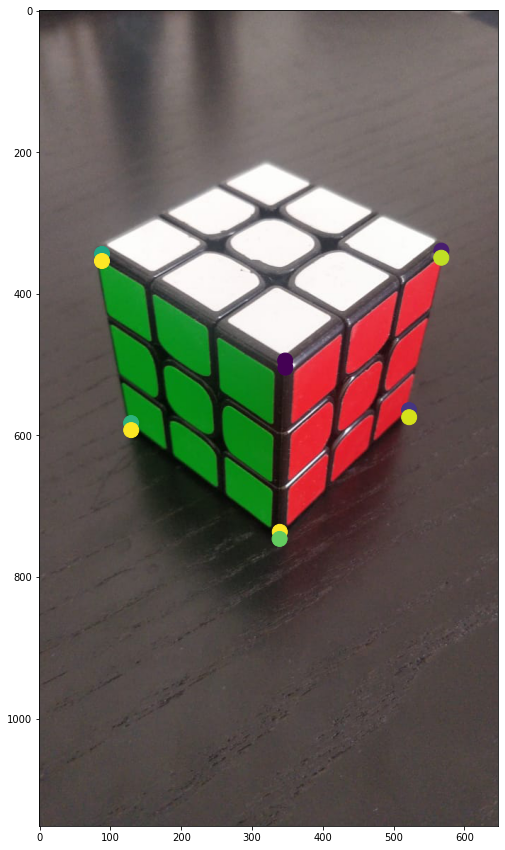

In [25]:
N = len(x)
# image_points = np.array(image_points)
fig = plt.figure(figsize=(10,15))

img=mpimg.imread('q1/dlt1.jpeg')
imgplot = plt.imshow(img)

colors = np.random.rand(N)
area = (15 * np.ones(N))**2 

plt.scatter(x[:,0], x[:,1], c=colors, s=area)
colors = np.random.rand(N)
plt.scatter(xEst[:,0], xEst[:,1]+10, c=colors, s=area)
plt.show()

### Zhangs method

For this task, use the inbuilt Opencv function to estimate the K matrix of a camera. Use the checkerboard images 5456-5470 in `q1/zhangs` folder for this task. Familiarize yourself with the different parameters for this method.

**Reference**: https://docs.opencv.org/3.4/dc/dbb/tutorial_py_calibration.html

In [10]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [ ]:
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)

objp = np.zeros((*8,3), np.float32)
objp[:,:2] = np.mgrid[0:6,0:8].T.reshape(-1,2)
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
images = glob.glob('q1/Zhangs/*.JPG')
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(img)
    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (7,6), None)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv2.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners)
        # Draw and display the corners
        plt.drawChessboardCorners(img, (7,6), corners2, ret)
        plt.imshow(img)
# cv2.destroyAllWindows()

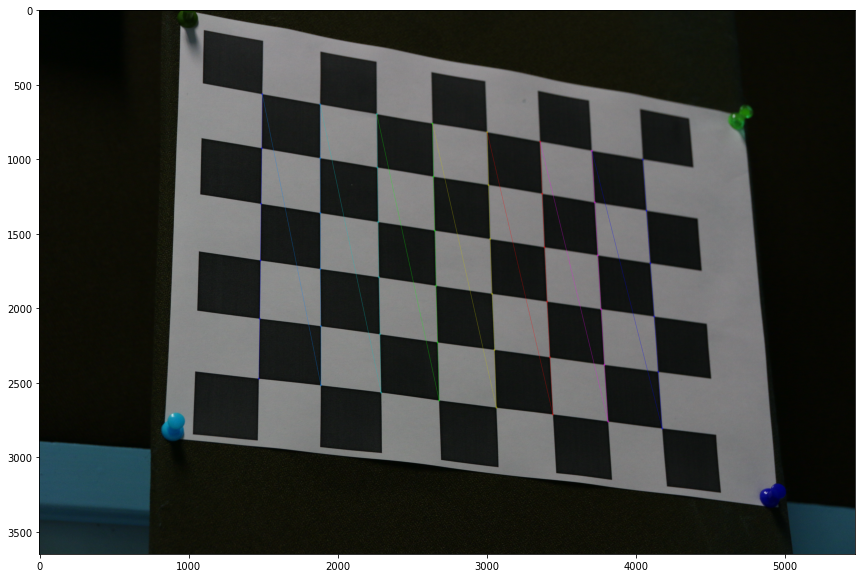

In [12]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
objp = np.zeros((6*8,3), np.float32)
objp[:,:2] = np.mgrid[0:6,0:8].T.reshape(-1,2)

objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

plt.figure(figsize=(20,10))
PATH = 'q1/Zhangs/'

for fname in sorted(os.listdir(PATH)):    
    fname = PATH + fname
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (6, 8),None)
    
    if ret == True:
        objpoints.append(objp)

        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (6,8), corners2,ret)
        plt.imshow(img)

---
### 4.2 Epipolar lines
#### Task 1

For this task, you have been given two images of the same scene taken from different view-points. You should first estimate the fundamental matrix from these two images.

<img src="./q2/img1.jpg" alt="image 1" width="400"/>
<img src="./q2/img2.jpg" alt="image 2" width="400"/>


Recall that given a point in one image, it's corresponding location in the other image can be found to along a line viz. the epipolar line. The task given to you is to draw the epipolar lines in the second image for each given point in the first image. You have to repeat this for the other image as well. Draw epipolar lines on the first image for the corresponding points in the second image.

The convention used for F is $x'^{T}Fx$ where $x'$ is the location of the point in the second image. For this question you will need to compute the F matrix on your own without using inbuilt functions. 

**Provide a clear explanation on your approach for both this task and the next**

#### Task 2
Report the location of the epipoles. Mathematically find the epipoles and verify that the lines intersect at the epipole.

____
### 4.3 Drawing a bounding box around a car and localizing it in the camera frame
You’ve been provided with an image, also taken from a self-driving car, that shows another car in front. The camera has been placed on top of the car, 1.65 m from the ground, and assume the image plane is perfectly perpendicular to the ground. K is provided to you. Your task is to draw a 3D-bounding box around the car in front as shown. Your approach should be to place eight points in the 3D world such that they surround all the corners of the car, then project them onto the image, and connect the projected image points using lines. You might have to apply a small 5° rotation about the vertical axis to align the box perfectly. Rough dimensions of the car - h: 1.38 m, w: 1.51, l: 4.10. (Hint: Fix a point on the ground as your world origin.). Also estimate the approximate translation vector to the mid-point of the two rear wheels of the car in the camera frame.

![Kitti car](./q3/image.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

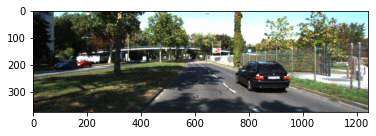

In [2]:
img = cv2.imread("q3/image.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [4]:
%matplotlib tk
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
import numpy as np


image_points = []
fig = plt.figure(figsize=(20,30))

img = mpimg.imread('q3/image.png')

def onclick(event):
    ix, iy = event.xdata, event.ydata
    image_points.append([ix, iy])
cid = fig.canvas.mpl_connect('button_press_event', onclick)

imgplot = plt.imshow(img)
plt.show()

In [5]:
print(image_points)

[[948.8064516129032, 301.5761693548387]]


In [6]:
qq = [[1,2]]
qqq = 4
qq[0].append(qqq)
print(qq)

[[1, 2, 4]]


In [7]:
# image_points = [946.5806451612902, 297.12455645161293,1]
image_points[0].append(1)
image_points = image_points[0]
print(image_points)

[948.8064516129032, 301.5761693548387, 1]


In [8]:
H = 1.38
W = 1.51
L = 4.10

In [9]:
T_Y = 1.65
# x=np.array([955,301,1])

In [10]:
K = [[7.2153e+02,0,6.0955e+02],
     [0,7.2153e+02,1.7285e+02],
                     [0,0,1]]

Here, 
1) Height of Car = Width in Image
2) Width of Car = Height of Image
3) Length of Car = Depth of Image 

In [11]:
X = np.array([[0,0,0],
     [0,H,0],
     [W,H,0],
     [W,0,0],
     [0,0,-L],
     [0,H,-L],
     [W,H,-L],
     [W,0,-L]])
X = np.hstack((X,np.ones((8,1))))
print(X)
X = X.T
print(X)

[[ 0.    0.    0.    1.  ]
 [ 0.    1.38  0.    1.  ]
 [ 1.51  1.38  0.    1.  ]
 [ 1.51  0.    0.    1.  ]
 [ 0.    0.   -4.1   1.  ]
 [ 0.    1.38 -4.1   1.  ]
 [ 1.51  1.38 -4.1   1.  ]
 [ 1.51  0.   -4.1   1.  ]]
[[ 0.    0.    1.51  1.51  0.    0.    1.51  1.51]
 [ 0.    1.38  1.38  0.    0.    1.38  1.38  0.  ]
 [ 0.    0.    0.    0.   -4.1  -4.1  -4.1  -4.1 ]
 [ 1.    1.    1.    1.    1.    1.    1.    1.  ]]


In [12]:
K_inv = np.linalg.inv(K)
print(K_inv)

[[ 0.00138594  0.         -0.84480202]
 [ 0.          0.00138594 -0.23956038]
 [ 0.          0.          1.        ]]


In [13]:
World_Origin = np.dot(K_inv,image_points)
print(World_Origin)

[0.47019036 0.17840723 1.        ]


In [14]:
World_Origin = (World_Origin/World_Origin[1])*(-T_Y)
print(World_Origin)

[-4.34855747 -1.65       -9.24850406]


In [15]:
t = World_Origin.reshape(3,1)
print(t)

[[-4.34855747]
 [-1.65      ]
 [-9.24850406]]


In [16]:
R = [[0.9962, 0, -0.0872],
     [0, 1, 0],
     [0.0872, 0, 0.9962]]
transformM = np.hstack((R,t))
print(transformM)

[[ 0.9962      0.         -0.0872     -4.34855747]
 [ 0.          1.          0.         -1.65      ]
 [ 0.0872      0.          0.9962     -9.24850406]]


In [17]:
P = np.array(K).dot(transformM)
print(P)

[[ 7.71940946e+02  0.00000000e+00  5.44316294e+02 -8.77504032e+03]
 [ 1.50725200e+01  7.21530000e+02  1.72193170e+02 -2.78912843e+03]
 [ 8.72000000e-02  0.00000000e+00  9.96200000e-01 -9.24850406e+00]]


In [18]:
x_box = P.dot(X)
print(x_box)

[[-8.77504032e+03 -8.77504032e+03 -7.60940949e+03 -7.60940949e+03
  -1.10067371e+04 -1.10067371e+04 -9.84110630e+03 -9.84110630e+03]
 [-2.78912843e+03 -1.79341703e+03 -1.77065752e+03 -2.76636892e+03
  -3.49512042e+03 -2.49940902e+03 -2.47664952e+03 -3.47236092e+03]
 [-9.24850406e+00 -9.24850406e+00 -9.11683206e+00 -9.11683206e+00
  -1.33329241e+01 -1.33329241e+01 -1.32012521e+01 -1.32012521e+01]]


In [19]:
x_box = x_box/x_box[2:3]
np.set_printoptions(suppress=True)
print(x_box.astype('float'))

[[948.80645161 948.80645161 834.65500312 834.65500312 825.53062448
  825.53062448 745.46764597 745.46764597]
 [301.57616935 193.91428226 194.21850813 303.43532745 262.14207836
  187.461431   187.60716842 263.03269589]
 [  1.           1.           1.           1.           1.
    1.           1.           1.        ]]


In [20]:
print(x_box[0,:])

[948.80645161 948.80645161 834.65500312 834.65500312 825.53062448
 825.53062448 745.46764597 745.46764597]


In [21]:
origin =         (x_box[0,0],x_box[1,0])
back_top_right = (x_box[0,1],x_box[1,1])
back_top_left =  (x_box[0,2],x_box[1,2])
back_bot_left =  (x_box[0,3],x_box[1,3])
front_bot_right =(x_box[0,4],x_box[1,4])
front_top_right =(x_box[0,5],x_box[1,5])
front_top_left = (x_box[0,6],x_box[1,6])
front_bot_left = (x_box[0,7],x_box[1,7])

<Figure size 1600x1600 with 0 Axes>

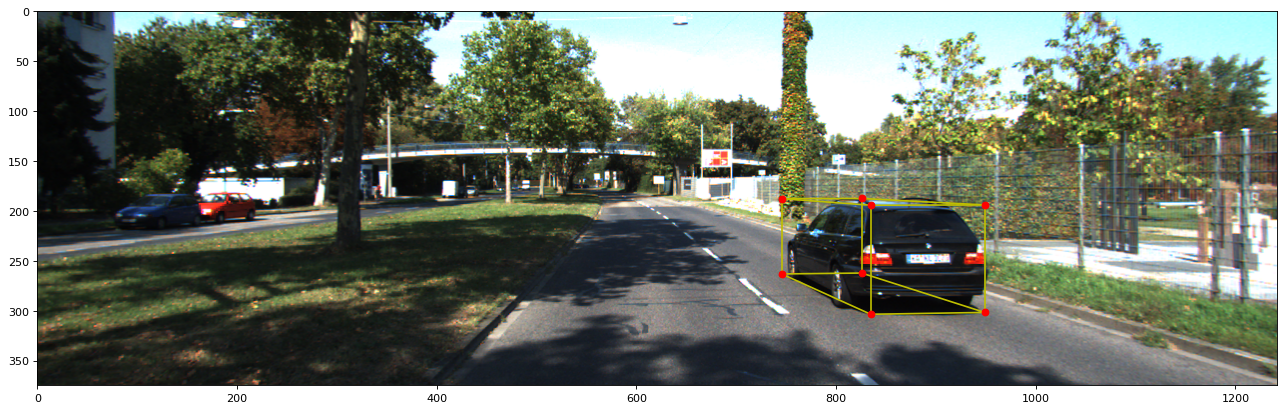

In [23]:
import cv2
%matplotlib inline
plt.figure(figsize=(20, 20), dpi=80)
img = cv2.imread("q3/image.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 20), dpi=80)
ax=plt.imshow(img)
plt.plot([origin[0],back_top_right[0]], [origin[1],back_top_right[1]],'y')
plt.plot([origin[0],back_bot_left[0]], [origin[1],back_bot_left[1]],'y')
plt.plot([back_top_left[0],back_bot_left[0]], [back_top_left[1],back_bot_left[1]],'y')
plt.plot([back_top_left[0],back_top_right[0]], [back_top_left[1],back_top_right[1]],'y')
plt.plot([front_top_left[0],front_top_right[0]], [front_top_left[1],front_top_right[1]],'y')
plt.plot([front_top_left[0],front_bot_left[0]], [front_top_left[1],front_bot_left[1]],'y')
plt.plot([front_bot_right[0],front_bot_left[0]], [front_bot_right[1],front_bot_left[1]],'y')
plt.plot([front_bot_right[0],front_top_right[0]], [front_bot_right[1],front_top_right[1]],'y')
plt.plot([front_bot_right[0],origin[0]], [front_bot_right[1],origin[1]],'y')
plt.plot([front_bot_left[0],back_bot_left[0]], [front_bot_left[1],back_bot_left[1]],'y')
plt.plot([front_top_left[0],back_top_left[0]], [front_top_left[1],back_top_left[1]],'y')
plt.plot([front_top_right[0],back_top_right[0]], [front_top_right[1],back_top_right[1]],'y')
plt.plot(x_box[0,0],x_box[1,0],'ro') 
plt.plot(x_box[0,1],x_box[1,1],'ro') 
plt.plot(x_box[0,2],x_box[1,2],'ro') 
plt.plot(x_box[0,3],x_box[1,3],'ro') 
plt.plot(x_box[0,4],x_box[1,4],'ro') 
plt.plot(x_box[0,5],x_box[1,5],'ro') 
plt.plot(x_box[0,6],x_box[1,6],'ro') 
plt.plot(x_box[0,7],x_box[1,7],'ro') 
plt.show()